In [1]:
# Load libraries
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
from string import ascii_letters
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Importing Data
chemistries_discovery=pd.DataFrame.from_csv('chemistries_git.csv')
chemistries_discovery.index=chemistries_discovery.index.astype('float64')
chemistries_validation=pd.DataFrame.from_csv('chemistries_val_git.csv')
prot=pd.DataFrame.from_csv('cleaned_proteomics.csv')
prot.index=prot.index.astype('float64')
prot_validation=pd.DataFrame.from_csv('proteomics_validation_impute.csv')
prot_validation.index=prot_validation.index.astype('float64')
discovery_mets=pd.DataFrame.from_csv('data_discovery.csv')
discovery_mets.index=discovery_mets.index.astype('float64')
print (discovery_mets.shape)
print (len(prot))
print (len(prot_validation))
print (len(chemistries_discovery))
print (len(chemistries_validation))
prot.drop(['sex','age'],1,inplace=True)
prot['shannon']=chemistries_discovery['shannon']

(399, 663)
262
176
399
540


(399, 77)


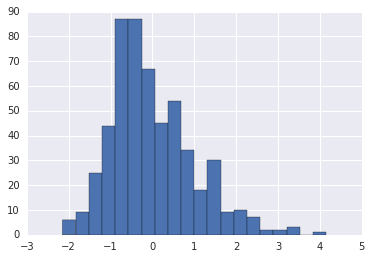

In [3]:
#Scale and standardize chemistries
C = chemistries_discovery.loc[:,chemistries_discovery.columns!='shannon']
C_validation = chemistries_validation.loc[:,chemistries_validation.columns!='shannon']
y = chemistries_discovery['shannon']
y_validation = chemistries_validation['shannon']
#y, _ = stats.boxcox(y)
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Ccolumns=C.columns
Cindex=C.index
C = scaler.fit_transform(C)
C=pd.DataFrame(data=C,columns=Ccolumns,index=Cindex)
print (C.shape)
sns.set(font_scale=1.00)
Ccolumns=C_validation.columns
Cindex=C_validation.index
C_validation = scaler.fit_transform(C_validation)
C_validation=pd.DataFrame(data=C_validation,columns=Ccolumns,index=Cindex)
C_validation[C_validation.columns[4]].hist(bins=20)

In [4]:
alphas = np.linspace(1,1000,200)
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
clinical_lasso=cross_val_score(lassocv,C,y,cv=10)
print ('LASSO Clinical Labs mean R2 discovery',np.mean(clinical_lasso))
print ('LASSO Clinical Labs std.dev. R2 discovery',np.std(clinical_lasso))
clinical_ridge=cross_val_score(ridgecv,C,y,cv=10)
print ('Ridge Clinical Labs mean R2 discovery',np.mean(clinical_ridge))
print ('Ridge Clinical Labs std.dev. R2 discovery',np.std(clinical_ridge))

LASSO Clinical Labs mean R2 discovery 0.014287995440638768
LASSO Clinical Labs std.dev. R2 discovery 0.07241550295868537
Ridge Clinical Labs mean R2 discovery 0.04976707046420844
Ridge Clinical Labs std.dev. R2 discovery 0.06414440222786218


In [5]:
clinical_lasso

array([-0.00118578,  0.01013307,  0.03860967,  0.07893114, -0.06392093,
        0.12813367,  0.0228558 , -0.14993282,  0.04180441,  0.03745172])

In [6]:
clinical_lasso_validation=cross_val_score(lassocv,C_validation,y_validation,cv=10)
print ('LASSO Clinical Labs mean R2 validation cohort',np.mean(clinical_lasso_validation))
print ('LASSO Clinical Labs std.dev. R2 validation cohort',np.std(clinical_lasso_validation))
clinical_ridge_validation=cross_val_score(ridgecv,C_validation,y_validation,cv=10)
print ('Ridge Clinical Labs mean R2 validation cohort',np.mean(clinical_ridge_validation))
print ('Ridge Clinical Labs std.dev. R2 validation cohort',np.std(clinical_ridge_validation))

LASSO Clinical Labs mean R2 validation cohort 0.05260391509880893
LASSO Clinical Labs std.dev. R2 validation cohort 0.07047866142625173
Ridge Clinical Labs mean R2 validation cohort 0.08126132461496528
Ridge Clinical Labs std.dev. R2 validation cohort 0.06503358303921523


In [7]:
#Scale and standardize chemistries
p = prot.loc[:,prot.columns!='shannon']
py = prot['shannon']
p_validation = prot_validation.loc[:,prot_validation.columns!='shannon']
y = chemistries_discovery['shannon']
y_validation = prot_validation['shannon']
#y, _ = stats.boxcox(y)
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
pcolumns=p.columns
pindex=p.index
p = scaler.fit_transform(p)
p=pd.DataFrame(data=p,columns=pcolumns,index=pindex)
print (p.shape)
Ccolumns=p_validation.columns
Cindex=p_validation.index
p_validation = scaler.fit_transform(p_validation)
p_validation=pd.DataFrame(data=p_validation,columns=Ccolumns,index=Cindex)

(262, 263)


In [8]:
p_lasso=cross_val_score(lassocv,p,py,cv=10)
print ('LASSO Proteomics mean R2 discovery cohort',np.mean(p_lasso))
print ('LASSO Proteomics std dev. R2 discovery cohort',np.std(p_lasso))
p_ridge=cross_val_score(ridgecv,p,py,cv=10)
print ('Ridge Proteomics mean R2 discovery cohort',np.mean(p_ridge))
print ('Ridge Proteomics std dev. R2 discovery cohort',np.std(p_ridge))

LASSO Proteomics mean R2 discovery cohort 0.10675946100201447
LASSO Proteomics std dev. R2 discovery cohort 0.07052447103195425
Ridge Proteomics mean R2 discovery cohort 0.13120517502192397
Ridge Proteomics std dev. R2 discovery cohort 0.07406545025140095


In [9]:
alphas = np.linspace(800,1000,200)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
p_lasso_validation=cross_val_score(lassocv,p_validation,y_validation,cv=10)
print ('LASSO Proteomics mean R2 discovery cohort',np.mean(p_lasso_validation))
print ('LASSO Proteomics std dev. R2 discovery cohort',np.std(p_lasso_validation))
p_ridge_validation=cross_val_score(ridgecv,p_validation,y_validation,cv=10)
print ('Ridge Proteomics mean R2 discovery cohort',np.mean(p_ridge_validation))
print ('Ridge Proteomics std dev. R2 discovery cohort',np.std(p_ridge_validation))

LASSO Proteomics mean R2 discovery cohort -0.06853768285695391
LASSO Proteomics std dev. R2 discovery cohort 0.23708603639510709
Ridge Proteomics mean R2 discovery cohort -0.0007898782182449778
Ridge Proteomics std dev. R2 discovery cohort 0.16269554555751126


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ec8bf7b70>]],
      dtype=object)

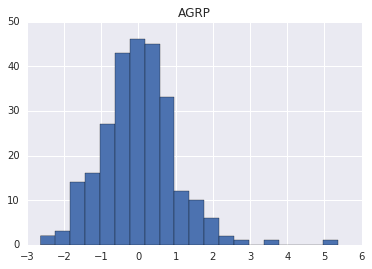

In [10]:
#joining clinical labs and proteomics
merged = pd.merge(left=prot.drop(['shannon'],1), left_index=True,
                  right=chemistries_discovery, right_index=True,
                  how='inner')
merged_scaled = merged.loc[:,merged.columns!='shannon']
y_merged = merged['shannon']
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
mcolumns=merged_scaled.columns
mindex=merged_scaled.index
M = scaler.fit_transform(merged_scaled)
merged_scaled=pd.DataFrame(data=M,columns=mcolumns,index=mindex)
merged_scaled[merged.columns[2:3]].hist(bins=20)

In [11]:
#Running LASSO and Ridge on merged datasets proteomics and clinical labs
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
merged_lasso=cross_val_score(lassocv,merged_scaled,y_merged,cv=10)
print ('LASSO merged mean R2 discovery cohort',np.mean(merged_lasso))
print ('LASSO merged std dev. R2 discovery cohort',np.std(merged_lasso))
merged_ridge=cross_val_score(ridgecv,merged_scaled,y_merged,cv=10)
print ('Ridge merged mean R2 discovery cohort',np.mean(merged_ridge))
print ('Ridge merged std dev. R2 discovery cohort',np.std(merged_ridge))

LASSO merged mean R2 discovery cohort 0.08854577717811178
LASSO merged std dev. R2 discovery cohort 0.0670782165613813
Ridge merged mean R2 discovery cohort 0.12776256652980614
Ridge merged std dev. R2 discovery cohort 0.06556358503026018


(399, 736)
LASSO merged mets and clinical labs mean R2 discovery cohort 0.44691137738772035
LASSO merged mets and clinical labs std dev. R2 discovery cohort 0.10532544715046221
Ridge merged mets and clinical labs mean R2 discovery cohort 0.34084360054226287
Ridge merged mets and clinical labs std dev. R2 discovery cohort 0.11614513189665707


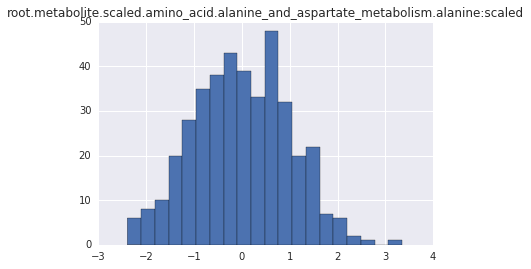

In [12]:
#mets and clinical labs
mets_clinical = pd.merge(left=discovery_mets[discovery_mets.columns[0:659]], left_index=True,
                  right=chemistries_discovery, right_index=True,
                  how='inner')
merged_metsclin = mets_clinical.loc[:,mets_clinical.columns!='shannon']
y_merged = mets_clinical['shannon']
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
mcolumns=merged_metsclin.columns
mindex=merged_metsclin.index
M = scaler.fit_transform(merged_metsclin)
merged_metsclin=pd.DataFrame(data=M,columns=mcolumns,index=mindex)
merged_metsclin[merged_metsclin.columns[2:3]].hist(bins=20)
print (merged_metsclin.shape)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
lassocv=LassoCV(eps=0.015, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
merged_lasso=cross_val_score(lassocv,merged_metsclin,y_merged,cv=10)
print ('LASSO merged mets and clinical labs mean R2 discovery cohort',np.mean(merged_lasso))
print ('LASSO merged mets and clinical labs std dev. R2 discovery cohort',np.std(merged_lasso))
merged_ridge=cross_val_score(ridgecv,merged_metsclin,y_merged,cv=10)
print ('Ridge merged mets and clinical labs mean R2 discovery cohort',np.mean(merged_ridge))
print ('Ridge merged mets and clinical labs std dev. R2 discovery cohort',np.std(merged_ridge))

In [13]:
#proteins and mets
mets_prots = pd.merge(left=discovery_mets[discovery_mets.columns[0:659]], left_index=True,
                  right=prot, right_index=True,
                  how='inner')
mets_prots_scaled = mets_prots.loc[:,mets_prots.columns!='shannon']
y_merged = mets_prots['shannon']
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
mcolumns=mets_prots_scaled.columns
mindex=mets_prots_scaled.index
Mp = scaler.fit_transform(mets_prots_scaled)
mets_prots_scaled=pd.DataFrame(data=Mp,columns=mcolumns,index=mindex)
print (mets_prots_scaled.shape)

(262, 922)


In [14]:
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
lassocv=LassoCV(eps=0.015, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
merged_lasso_2=cross_val_score(lassocv,mets_prots_scaled,y_merged,cv=10)
print ('LASSO mets+prots  mean R2 discovery cohort',np.mean(merged_lasso_2))
print ('LASSO mets+prots std dev. R2 discovery cohort',np.std(merged_lasso_2))

LASSO mets+prots  mean R2 discovery cohort 0.3964953150355976
LASSO mets+prots std dev. R2 discovery cohort 0.08682685882678069


(262, 999)
LASSO merged mean R2 discovery cohort 0.39709106414332795
LASSO merged std dev. R2 discovery cohort 0.08707907416569671
Ridge merged mean R2 discovery cohort 0.3495174868292769
Ridge merged std dev. R2 discovery cohort 0.08965138790911013


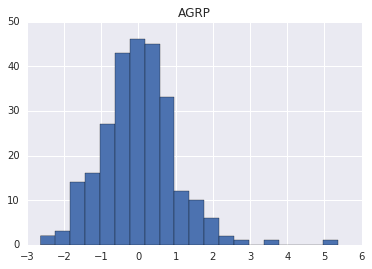

In [16]:
#proteins, mets, and clinical labs
merged = pd.merge(left=prot.drop(['shannon'],1), left_index=True,
                  right=mets_clinical, right_index=True,
                  how='inner')
merged_scaled = merged.loc[:,merged.columns!='shannon']
y_merged = merged['shannon']
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
mcolumns=merged_scaled.columns
mindex=merged_scaled.index
M = scaler.fit_transform(merged_scaled)
merged_scaled=pd.DataFrame(data=M,columns=mcolumns,index=mindex)
merged_scaled[merged.columns[2:3]].hist(bins=20)
print (merged_scaled.shape)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
lassocv=LassoCV(eps=0.015, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
merged_lasso_2=cross_val_score(lassocv,merged_scaled,y_merged,cv=10)
print ('LASSO merged mean R2 discovery cohort',np.mean(merged_lasso_2))
print ('LASSO merged std dev. R2 discovery cohort',np.std(merged_lasso_2))
merged_ridge=cross_val_score(ridgecv,merged_scaled,y_merged,cv=10)
print ('Ridge merged mean R2 discovery cohort',np.mean(merged_ridge))
print ('Ridge merged std dev. R2 discovery cohort',np.std(merged_ridge))